In [29]:
#TSN
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import random

In [30]:
dpsh = np.load(r"c:\Users\frede\Desktop\TSNE hash codes\TSNE hash codes\tsne_dpsh_hashes.npy")
dsh = np.load(r"c:\Users\frede\Desktop\TSNE hash codes\TSNE hash codes\tsne_dsh_hashes.npy")
dtsh = np.load(r"c:\Users\frede\Desktop\TSNE hash codes\TSNE hash codes\tsne_dtsh_hashes.npy")
subic = np.load(r"c:\Users\frede\Desktop\TSNE hash codes\TSNE hash codes\tsne_subic_hashes.npy")
labels = np.load(r"c:\Users\frede\Desktop\TSNE hash codes\TSNE hash codes\y_test_Cifar.npy")

In [31]:
dsh= (dsh >= 0).astype(int)
dpsh = (dpsh >= 0).astype(int)
dtsh= (dtsh >= 0).astype(int)


In [32]:
np.max(dtsh)

1

In [33]:
np.mean(subic)

0.25

In [34]:
np.mean(dsh)

0.5022166666666666

In [35]:
np.mean(dpsh)

0.49574583333333333

In [36]:
np.mean(dtsh)

0.48833333333333334

In [37]:
dsh

array([[0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 1, 0]])

In [38]:

def visualize_tsne(hash_codes, labels, perplexity=30, random_state=42,title_name = "Change This"):
    """
    Visualize high-dimensional hash codes using t-SNE.

    Parameters:
        hash_codes (numpy.ndarray): High-dimensional data (n_samples, n_features).
        labels (array-like): Labels corresponding to the hash codes (n_samples,).
        perplexity (float, optional): Perplexity parameter for t-SNE. Default is 30.
        random_state (int, optional): Random seed for reproducibility. Default is 42.

    Returns:
        None: Displays a scatter plot.
    """
    if len(hash_codes) != len(labels):
        raise ValueError("hash_codes and labels must have the same length.")

    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
    hash_codes_2d = tsne.fit_transform(hash_codes)

    # Shuffle colors in the palette
    palette = sns.color_palette("tab10")
    #random.shuffle(palette)

    # Define class names
    class_names = [
        "airplane", "automobile", "bird", "cat", "deer", 
        "dog", "frog", "horse", "ship", "truck"
    ]

    # Plot
    plt.figure(figsize=(10, 8))
    plt.title(f"TSNE for {title_name} on CIFAR-10")
    scatter_plot = sns.scatterplot(
        x=hash_codes_2d[:, 0], 
        y=hash_codes_2d[:, 1], 
        hue=[class_names[label] for label in labels], 
        palette=palette, 
        legend="full"
    )
    scatter_plot.legend_.set_title("Label")
    scatter_plot.legend(loc='upper right', bbox_to_anchor=(1, 1)) 
    # Set x and y axis labels
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.savefig(fr"C:\Users\frede\Desktop\TSNE hash codes\{title_name}.jpg",dpi = 200)
    


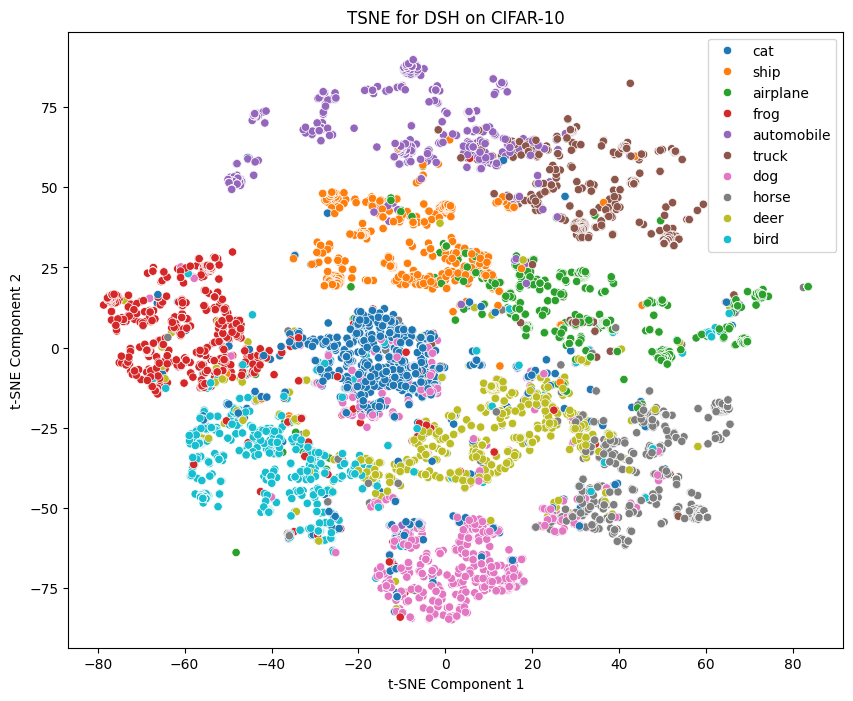

In [39]:
visualize_tsne(dsh, labels, perplexity=30, random_state=42,title_name= "DSH")

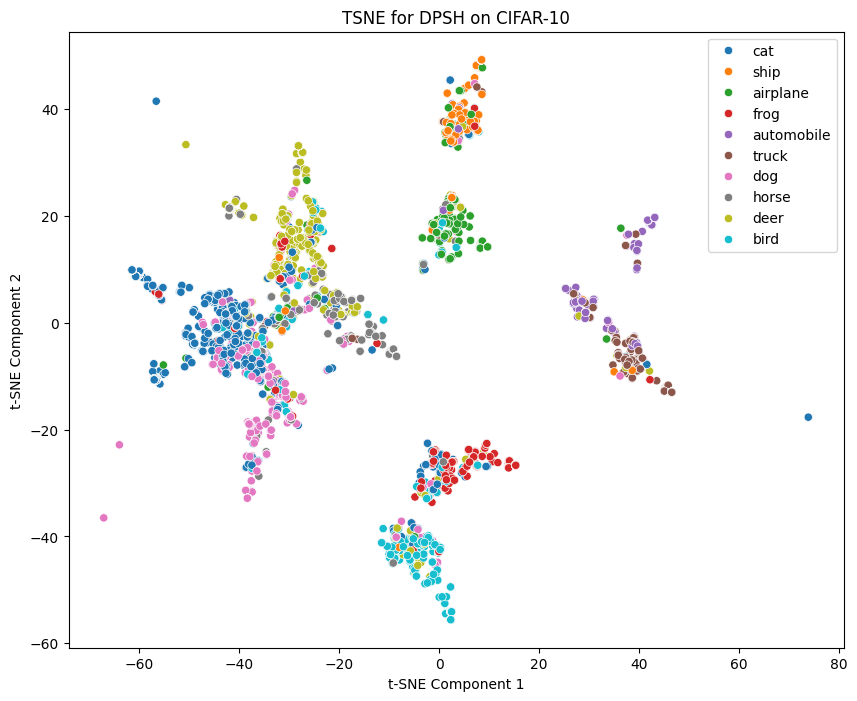

In [40]:
visualize_tsne(dpsh, labels, perplexity=30, random_state=42,title_name= "DPSH")

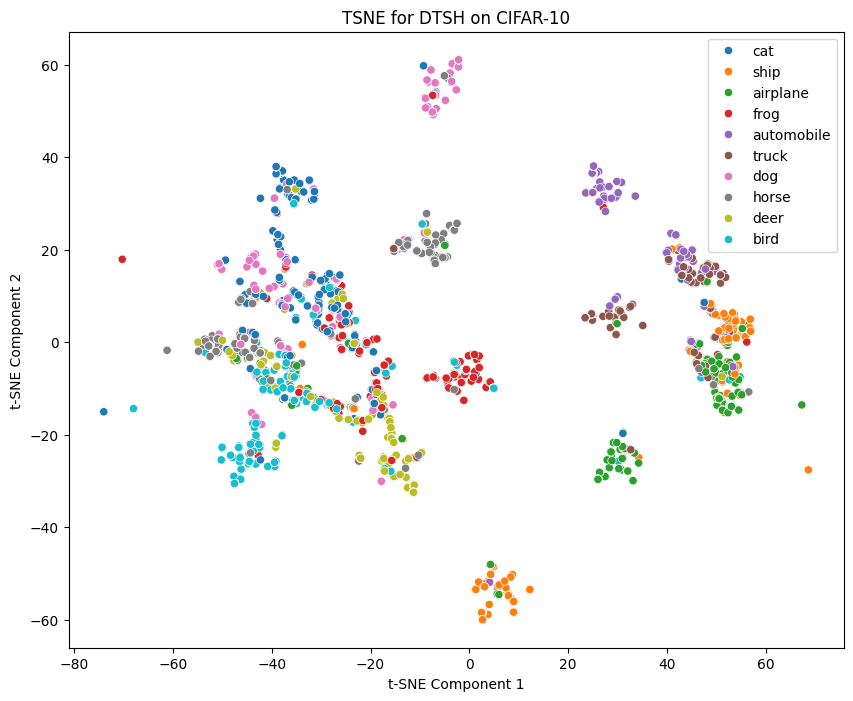

In [41]:
visualize_tsne(dtsh, labels, perplexity=30, random_state=42,title_name= "DTSH")

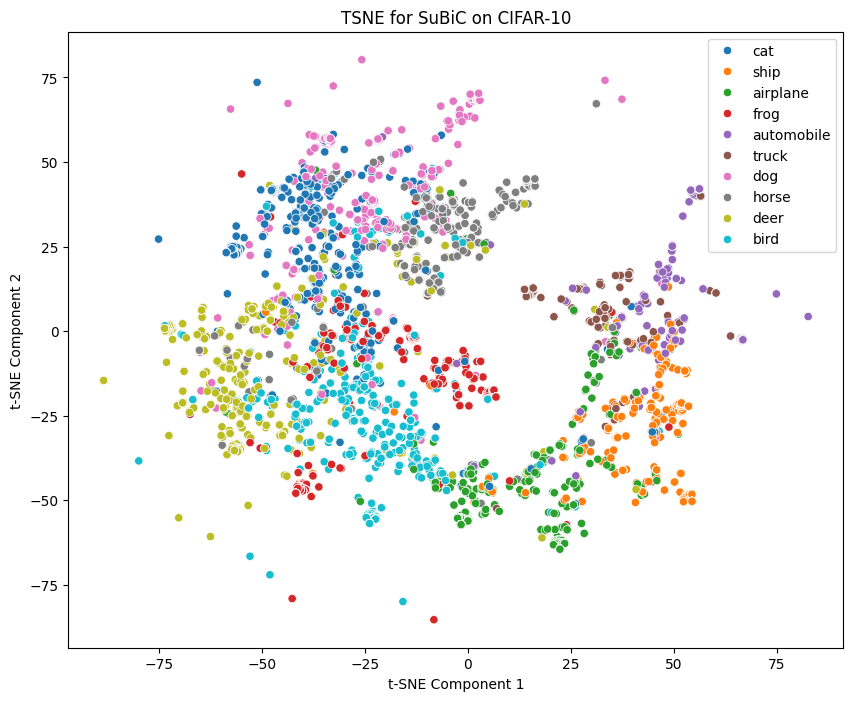

In [42]:
visualize_tsne(subic, labels, perplexity=30, random_state=42,title_name= "SuBiC")